# ECS7020P mini-project submission


## What is the problem?

This year's mini-project considers the problem of predicting whether a narrated story is true or not. Specifically, you will build a machine learning model that takes as an input an audio recording of **30 seconds** of duration and predicts whether the story being narrated is **true or not**. 


## Which dataset will I use?

A total of 100 samples consisting of a complete audio recording, a *Language* attribute and a *Story Type* attribute have been made available for you to build your machine learning model. The audio recordings can be downloaded from:

https://github.com/MLEndDatasets/Deception/tree/main/MLEndDD_stories_small

A CSV file recording the *Language* attribute and *Story Type* of each audio file can be downloaded from:

https://github.com/MLEndDatasets/Deception/blob/main/MLEndDD_story_attributes_small.csv




## What will I submit?

Your submission will consist of **one single Jupyter notebook** that should include:

*   **Text cells**, describing in your own words, rigorously and concisely your approach, each implemented step and the results that you obtain,
*   **Code cells**, implementing each step,
*   **Output cells**, i.e. the output from each code cell,

Your notebook **should have the structure** outlined below. Please make sure that you **run all the cells** and that the **output cells are saved** before submission. 

Please save your notebook as:

* ECS7020P_miniproject_2425.ipynb


## How will my submission be evaluated?

This submission is worth 16 marks. We will value:

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

**The final performance of your solutions will not influence your grade**. We will grade your understanding. If you have an good understanding, you will be using the right methodology, selecting the right approaches, assessing correctly the quality of your solutions, sometimes acknowledging that despite your attempts your solutions are not good enough, and critically reflecting on your work to suggest what you could have done differently. 

Note that **the problem that we are intending to solve is very difficult**. Do not despair if you do not get good results, **difficulty is precisely what makes it interesting** and **worth trying**. 

## Show the world what you can do 

Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. **Potential employers are always looking for this kind of evidence**. 





-------------------------------------- PLEASE USE THE STRUCTURE BELOW THIS LINE --------------------------------------------

# Exploring Audio Features for Deceptive Storytelling Detection Using Machine Learning

# 1 Author

**Student Name**:  Erica Low Ee Zhin

**Student ID**: 231126519



# 2 Problem Formulation 

Describe the machine learning problem that you want to solve and explain what's interesting about it.

Detecting deception is a vital yet complex challenge, with applications across various fields, ranging from law enforcement, police investigation, private consulting to psychological research.[1] Traditional lie detection methods, such as polygraphs tests, have significant limitations as they rely on physiological measurements, like heartbeat, blood pressure, respiration and skin temperature. [1][2] This approach often fail to capture the nuanced nature of human deception, as one can supress physical signs of discomfort, leading to false conclusions. While previous research has extensively explored visual and behavioral cues, such as eye blink analysis, pupil dilation and facial expression analysis [2], there is limited work on predicting deception purely based on speech data. 

With this, this project aims to fill this gap by developing a machine learning model to determine whether a narrated story is truthful or deceptive based soley on audio features. The problem of deceptive storytelling detection is framed as a binary classification task, with the labels of `true_story` and `deceptive_story`. However, raw audio signals, being high-dimensional data, pose challenges for direct analysis, as we will be operating in a predictor space consisting of hundreds of thousands of dimensions. 

To address this, we extract a set of four key audio features - Power, Pitch Mean, Pitch Standard Deviation, and Voice Fraction, which are extracted from 30-second segments of audio recordings. These features provide a manageable and informative predictor space for the model. Unlike polygraph tests, this non-invasive approach only requires only a short audio sample and can be performed without the need for specialized expertise such as polygraphists or psychologists. In addition to that, this approach also eliminates the reliance on physiological measures, providing a portable, more easily accessible tool for deception detection that individuals cannot easily manipulate. 

# 3 Methodology

Describe your methodology. Specifically, describe your training task and validation task, and how model performance is defined (i.e. accuracy, confusion matrix, etc). Any other tasks that might help you build your model should also be described here.

#### **3.1 Data Preprocessing**
- The original dataset consists of 100 raw audio recordings, which were then further divided into several 30-second chunks based on the original audio file length to standardize input lengths. Any chunks shorter than 30 seconds were considered invalid and discarded.
- Each chunk was assigned a unique identifier (e.g., 00001.wav_chunk1), and chunks from the same recording share the same File ID to maintain traceability.
- The sampling rate of each chunk was recorded to ensure compatibility across the dataset.
- Class distributions (`true_story` and `deceptive_story`) were monitored to maintain balance after splitting into 30s chunks.

#### **3.2 Feature Extraction and Labels** 
- From each 30-second chunk, the following four audio features were extracted: 
  - **Power** : Represents the loudness of the audio.
  - **Pitch Mean** : Meaures the average highness or lowness of the sound.
  - **Pitch Standard Deviation** : Measures the pitch variability, distinguishing steady tones and shaky tones 
  - **Fraction of voiced region.** : Represents the proportion of time the audio contains voiced sounds. 
- Labels were assigned to each chunk, where true_story was encoded as 0 and deceptive_story as 1.
- The File ID, extracted features, and labels were consolidated into a feature matrix, `features_df`. Each row represents a valid chunk, with columns for the File ID, four features, and label.

#### **3.3 Train-Test Split**
- **Objective:** To split the dataset into training (70%) and testing (30%) subsets while ensuring statistical independance by grouping chunks based on their File ID. This training -testing set to evaluate the performance of machine learning models on unseen data.
- **Steps:**
  1. Unique File IDs were identified and split using train_test_split.
  2. Training (`train_features_df`) and testing (`test_features_df`) subsets were created by selecting chunks based on their File ID.
  3. From these subsets:
    - `X_train` and `X_test` were created by excluding `Label` and `File ID` columns.
    - `y_train` and `y_test` were derived from the `Label` column.
  4. Class distributions (0 and 1) in both training and testing subsets were displayed to confirm balance.

#### **3.4 Train-Cross-Validation Split**
- **Objective:**  To tune hyperparameters and evaluate model performance reliably, the training set is further divided into training and validation subsets using stratified group cross-validation. This is to ensure a balanced class distributions and statistical independance across training and validation set.
- **Steps:**
  1. StratifiedGroupKFold was used with File ID as the grouping criterion to prevent chunks from the same audio file from being split across training and validation sets.
  2. Five cross-validation folds were created, and indices for training (`train_idx`) and validation (`valid_idx`) splits were generated.
  3. For each fold:
    - Features (`X_cv_train`, `X_cv_valid`) and labels (`y_cv_train`, `y_cv_valid`) were extracted based on the indices.
  4. Average class distributions across all folds were computed and displayed to verify balance.

#### **3.5 Model Performance Metrics**
- F1 score is chosen as the primary metric because it balances precision and recall, which is crucial for the deceptive storytelling task, where false positives (true stories misclassified as deceptive) and false negatives (deceptive stories misclassified as true) have different implications.

 
#### **3.6 Model Training** ** more detials, add in the library or code using the hared cv splits ... and the sclaing is using the pipeline 
- A total of four classifiers models were trained and evaluated, Logistic Regression, Random Forest, Gradient Boosting and Support Vector Machine (SVM).
- Grid Search was performed, leveraging the train-cv splits for tuning the hyperparameters for each model.
- The combination of hyperparameters yielding the highest mean F1 score across folds was selected.
- Then, each model's performance was assessed using training F1 Score and validation F1 Score (mean across folds)

#### **3.7 Model Testing** scaling using the pipeline in model training 
- The model with the highest mean F1 score from the validation folds was selected as the best-performing model.
- The test dataset was standardized and used to evaluate the final model’s performance on unseen data.
- Utilised metrics such as testing F1 score, and a normalized confusion matrix to analyze the model's ability to generalize effectively.

6.2 Model Testing
In this section, we evaluate the performance of the Gradient Boosting Classifier on the unseen testing dataset to assess its generalization ability. As the best-performing model based on cross-validated F1 scores during training and validation, Gradient Boosting was chosen for this stage of testing.

Evaluation Process
The unseen testing dataset (X_test and y_test) was scaled using the same scaling parameters derived during the training process, ensuring consistency and avoiding data leakage.
The Gradient Boosting Classifier, optimized with the best hyperparameters (learning_rate=0.2, max_depth=3, n_estimators=50), was used to make predictions on the test set.
Performance metrics were calculated to evaluate the model’s ability to accurately classify audio chunks as true_story (0) or deceptive_story (1).
Results and Analysis
The testing F1 score serves as the primary metric, reflecting the model's balance between precision and recall in handling both classes.
A normalized confusion matrix was generated to provide additional insights into the model's performance, detailing the proportions of:
True Positives (TP): Correctly classified deceptive_story chunks.
True Negatives (TN): Correctly classified true_story chunks.
False Positives (FP): true_story chunks misclassified as deceptive_story.
False Negatives (FN): deceptive_story chunks misclassified as true_story.
Significance of Testing
Testing the Gradient Boosting Classifier on unseen data is critical for evaluating its real-world applicability and robustness. The final output includes:

Testing F1 Score: A quantitative measure of the model's predictive performance.
Normalized Confusion Matrix: A visual representation to analyze how well the model distinguishes between truthful and deceptive stories.
This analysis provides a comprehensive understanding of the Gradient Boosting Classifier's ability to generalize and perform effectively on previously unseen data.

# 4 Implemented ML prediction pipelines

Describe the ML prediction pipelines that you will explore. Clearly identify their input and output, stages and format of the intermediate data structures moving from one stage to the next. It's up to you to decide which stages to include in your pipeline. After providing an overview, describe in more detail each one of the stages that you have included in their corresponding subsections (i.e. 4.1 Transformation stage, 4.2 Model stage, 4.3 Ensemble stage).


# 4 Implemented ML prediction pipelines
This section describes the overview of the machine learning (ML) prediction pipelines implemented for the audio-based deception detection.

#### **Pipeline Overview**
##### **1. Input:**
The pipeline begins with 100 raw audio recordings, where each recording is split into 30-second chunks to standardize input lengths. Each chunk is associated with:
- Unique Identifiers: A `File ID` indicating its source file and a `Chunk ID` for individual chunks.
- Labels: Binary labels (`0` for `true_story` and `1` for `deceptive_story`) to guide supervised learning.

This structured format serves as the foundation for subsequent processing and ensures traceability of each chunk back to its source.

##### **2. Transformation Stage:**
 A total of four audio features were extracted from the each individual 30s chunks, including power, pitch mean, pitch standard deviation, and voiced fraction—from each chunk. These features are selected for their relevance to detecting deceptive behavior. Then all these features are combined into a feature matrix for subsequent input for the model stage.

**Intermediate Output:** The transformation stage outputs a feature matrix where:
- Rows: Represent individual 30s valid audio chunks.
- Columns: Contain four extracted features, the `File ID`, and the corresponding binary label.

##### **3. Model Stage:**
**3.1 Train-test Split:**

Using `File ID`, the feature matrix is divided into:
- Training Dataset (70%): Used for model training and validation.
    - Within the training dataset, a StratifiedGroupKFold is applied to create cross-validation splits, ensuring no data leakage by grouping chunks based on their `File ID` and maintaining balanced class distributions.
- Testing Dataset (30%): Held out for final model evaluation.


**3.2 Model Training and Validation:**

A pipeline combining a StandardScaler and a machine learning classifier is constructed for each model. The classifiers including, Logistic Regression, Random Forest, Gradient Boosting and Support Vector Machines (SVM).

Each pipeline is optimized using GridSearchCV with the precomputed cross-validation splits, selecting the best hyperparameters based on the highest mean validation F1 score.

**Intermediate Output:**  
- A summary of training and validation F1 scores for each model.
- Best hyperparameters for each classifier.
- Bar charts visualizing model performance across metrics.
- Confusion matrices highlighting prediction details.

**3.3 Final Output: Model Testing:**

The best-performing model, determined by validation F1 score, is applied to the unseen testing dataset. Before testing, the features in the test set are standardized using the scaler fitted on the training data. The details of each models are described in 4.2 Model Stage. Then, the F1 score of the test set is generated and analysed.



## **4.1 Transformation Stage**

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

This section outlines the transformation stage, detailing the input and output, and explaining the rationale behind the chosen preprocessing and feature extraction methods.

### **4.1.1 Input:**
- 100 raw audio files labeled with their corresponding File ID, Language, and Story Type (true_story or deceptive_story), stored in the `MLEND_df` dataframe.

### **4.1.2 Audio Splitting:**
- Each raw audio file is divided into 30-second chunks to standardize input length for feature extraction and model training.
- Chunks shorter than 30 seconds are discarded to ensure consistency in input duration and to prevent bias caused by shorter chunks having different statistical properties.
- Metadata such as total duration, sample rate, total number of chunks, valid chunks are recorded.
- Intermediate output: A `file_metadata` dataframe that summarizes the raw audio statistics for each file, including File ID, Duration(s), Sample Rate, Total Chunks, Valid Chunks (30s), and Story Type. Another dataframe, `chunk_df` containing only valid 30s chunks, with columns for File ID, Chunk ID, and Story Type.

### **4.1.3 Features Extraction and Labelling:**
- In this section, each valid 30s chunks in the `chunk_df` undergo feature extraction to derive four key audio features which capture the audio patterns relevant to deception storytelling detection, which are: 
  - **Power**: Measures the energy of the audio signal to capture intensity patterns.
  - **Pitch Mean and Standard Deviation**: Statistical measures of pitch to capture frequency variations relevant to storytelling dynamics.
  - **Voiced Fraction**: Proportion of time the audio contains voiced sounds, which is important for speech analysis.
-The story types (true_story and deceptive_story) are encoded as label of 0 and 1, respectively in each valid chunks.

### **4.1.4 Output:**
- A feature matrix saved as `extracted_features.csv`, where each row represents a valid chunk, with columns for the four features, File ID, and the corresponding label.
This CSV storage is to reduce processing time by avoiding redundant feature extraction during multiple runs.

## **4.2 Model Stage**

This stage focuses on building the machine learning models to classify audio chunks as either truthful (`0`) or deceptive (`1`). Four machine learning models were selected, each offering unique strengths and providing a diverse set of perspectives on the data. The objective was to achieve robust performance across models and to select the best-performing one based on cross-validated F1 scores.

### **4.2.1 Reasons for Classifiers Chosen**
Each model was chosen based on its specific characteristics, making it suitable for analyzing audio data:

- **Logistic Regression**:
  - Acts as a baseline model to assess whether the dataset is linearly separable.
  - Offers interpretability and quick implementation, enabling a straightforward comparison with more complex models.

- **Random Forest**:
  - A non-linear ensemble model capable of capturing intricate feature interactions.
  - Robust to outliers and less prone to overfitting when tuned properly.

- **Gradient Boosting**:
  - A boosting algorithm that builds strong classifiers by combining weak learners iteratively.
  - Suitable for datasets with slight imbalances just like our chunk dataset which consists of 52% true stories and 48% deceptive, as it optimizes performance at every iteration.
  - Provides high flexibility through hyperparameters like learning rate and maximum depth.

- **Support Vector Machine (SVM)**:
  - A powerful classifier effective for smaller datasets and high-dimensional feature spaces.
  - Well-suited for detecting complex, non-linear relationships in extracted audio features like pitch variability and voiced fraction.

### **4.2.2 Hyperparameter Optimization**
To achieve optimal performance, hyperparameter tuning was performed using GridSearchCV, with a custom cross-validation split (StratifiedGroupKFold) to ensure no data leakage and balanced class distributions. The parameter grids for each model are detailed below:

- **Logistic Regression[3]**:
  - `C`: Inverse of regularization strength, with values ranging from 0.1 to 100.
  - `max_iter`: Maximum iterations for solvers to converge, ranging from 100 to 500.

- **Random Forest[4]**:
  - `n_estimators`: Number of trees in the forest, ranging from 10 to 200.
  - `max_depth`: Maximum depth of each tree, ranging from 3 to 30.

- **Gradient Boosting[5]**:
  - `n_estimators`: Number of boosting stages, ranging from 10 to 100.
  - `max_depth`: Maximum depth of individual trees, ranging from 3 to 7.
  - `learning_rate`: Shrinks the contribution of each tree, with values ranging from 0.01 to 1.0.

- **Support Vector Machine (SVM)[6]**:
  - `C`: Regularization parameter, ranging from 0.1 to 20.
  - `kernel`: Specifies the kernel type; with options "linear" or "rbf".
  - `gamma`: Kernel coefficient, with options "scale" or "auto", which determine the influence of individual data points.

# 5 Dataset

Describe the datasets that you will create to build and evaluate your models. Your datasets need to be based on our MLEnd Deception Dataset. After describing the datasets, build them here. You can explore and visualise the datasets here as well. 

If you are building separate training and validation datasets, do it here. Explain clearly how you are building such datasets, how you are ensuring that they serve their purpose (i.e. they are independent and consist of ID samples) and any limitations you might think of. It is always important to identify any limitations as early as possible. The scope and validity of your conclusions will depend on your ability to understand the limitations of your approach.

If you are exploring different datasets, create different subsections for each dataset and give them a name (e.g. 5.1 Dataset A, 5.2 Dataset B, 5.3 Dataset 5.3) .



# **5 Dataset**

The datasets for this project are based on the MLEnd Deception Dataset, which consists of 100 audio recordings, each labeled as either `true_story` or `deceptive_story`. Below, we describe the datasets, the process of building them,  and any limitations observed.


## **5.1 Audio Dataset**
### **5.1.1 Original Data**:
- The datasets are derived from the MLEnd Deception Dataset, which can be installed in four steps:
   1. *Install the Required Library*:
      ```python
      pip install mlend==1.0.0.4
      ```
   2. *Import Library and Functions*:
       ```python
       import mlend
       from mlend import download_deception_small, deception_small_load
       ```
   3. *Download Small Data*:
       ```python
       datadir = download_deception_small(save_to='MLEnd', subset={}, verbose=1, overwrite=False)
       ```
   4. *Read File Paths*:
       ```python
       base_path = './MLEnd/deception/MLEndDD_stories_small/'
       MLEND_df = pd.read_csv('./MLEnd/deception/MLEndDD_story_attributes_small.csv').set_index('filename')
       ```
- In the code below, the MLEnd Deception Dataset (`MLEND_df`) consists of 100 audio files equally distributed between `true_story` and `deceptive_story` (50 files each).

- These stories are narrated in 16 languages, with English being the most common, representing 78 files, followed by other languages as shown in `language_df` as shown below.

In [15]:
#Data Loading 
import pandas as pd

base_path = './MLEnd/deception/MLEndDD_stories_small/'
MLEND_df = pd.read_csv('./MLEnd/deception/MLEndDD_story_attributes_small.csv').set_index('filename')
files = [base_path + file for file in MLEND_df.index]
display(MLEND_df.head())

#Data Distribution
story_type_counts = MLEND_df['Story_type'].value_counts()
print(story_type_counts)

#Langauge Distribution
language_counts = MLEND_df['Language'].value_counts()
language_df = pd.DataFrame(language_counts)
print("\nLanguages narrated in the dataset are:")
display(language_df)

,Language,Story_type
filename,,
00001.wav,Hindi,deceptive_story
00002.wav,English,true_story
00003.wav,English,deceptive_story
00004.wav,Bengali,deceptive_story
00005.wav,English,deceptive_story


Story_type
deceptive_story    50
true_story         50
Name: count, dtype: int64

Languages narrated in the dataset are:


,count
Language,
English,78
Hindi,4
Arabic,3
"Chinese, Mandarin",2
Marathi,2
Bengali,1
Kannada,1
French,1
Russian,1


### **5.1.2 Audio Metadata and Chunks Dataset**:
  - Each audio file was split into 30-second chunks. Chunks shorter than 30 seconds were discarded to maintain consistency.

  - Valid chunks were assigned unique identifiers in the format "FileID_ChunkID" (e.g., "00001.wav_chunk1").

  - Metadata, `metadata_df`, was created to track the file ID, total duration, valid chunk count, story type, and original sampling rate for each audio file.

  - The valid chunks were stored in `chunks_df`, containing the file ID, chunk ID, chunk data, and story type (`true_story` or `deceptive_story`).

  - The `chunk_data` in `chunks_df` is the raw audio signals (amplitude values) for each 30-second chunk of the audio file. These values represent the waveform of the audio, essentially describing how the sound's amplitude changes over time.
  
  - A total of 420 valid chunks were created, with 219 labeled as "true_story" and 201 labeled as "deceptive_story", resulting in a class distribution of approximately 52% and 48%, respectively.

In [ ]:
import librosa
import pandas as pd
from tqdm import tqdm

metadata_rows = []
chunk_rows = []

for file_id in tqdm(MLEND_df.index):
    file_path = base_path + file_id
    story_type = MLEND_df.loc[file_id, 'Story_type']

    audio_data, original_sr = librosa.load(file_path, sr=None)

    # Total duration and chunk size
    total_duration = len(audio_data) / original_sr
    chunk_size = int(30 * original_sr)  # 30 seconds in samples

    # Split the audio into chunks
    chunks = [audio_data[i:i + chunk_size] for i in range(0, len(audio_data), chunk_size)]
    valid_chunks = [chunk for chunk in chunks if len(chunk) == chunk_size]

    # Metadata
    metadata_rows.append({"File ID": file_id,
                          "Total Duration (s)": total_duration,
                          "Total Chunks": len(chunks),
                          "Valid Chunks": len(valid_chunks),
                          "Story Type": story_type,
                          "Original Sample Rate": original_sr})

    # Valid Chunks
    for i, chunk in enumerate(valid_chunks):
        chunk_rows.append({"File ID": file_id,
                           "Chunk ID": f"{file_id}_chunk{i + 1}",
                           "Chunk Data": chunk,
                           "Story Type": story_type,
                           "Sample Rate": original_sr})

# Convert to DataFrames
metadata_df = pd.DataFrame(metadata_rows)
chunks_df = pd.DataFrame(chunk_rows)

# Display Results
print("Summary of Audio Files:")
display(metadata_df)
print("\nSummary of Valid Audio Chunks:")
display(chunks_df)

# Summary Statistics
print("\nSummary Statistics:")
print(f"Total Files Processed: {len(metadata_df)}")
print(f"Total Chunks Created: {metadata_df['Total Chunks'].sum()}")
print(f"Total Valid Chunks (30s): {metadata_df['Valid Chunks'].sum()}")
print(f"Unique Sample Rates: {metadata_df['Original Sample Rate'].unique()}")

# True and Deceptive Story Distribution
valid_chunk_labels = chunks_df['Story Type'].value_counts()
print("\nCount of True and Deceptive Stories from Valid Chunks (30s):")
for story_type, count in valid_chunk_labels.items():
    print(f"{story_type}: {count} chunks")

100%|██████████| 100/100 [00:05<00:00, 16.96it/s]

Summary of Audio Files:


,File ID,Total Duration (s),Total Chunks,Valid Chunks,Story Type,Original Sample Rate
0,00001.wav,122.167256,5,4,deceptive_story,44100
1,00002.wav,125.192018,5,4,true_story,44100
2,00003.wav,162.984127,6,5,deceptive_story,44100
3,00004.wav,121.681270,5,4,deceptive_story,44100
4,00005.wav,134.189751,5,4,deceptive_story,44100
...,...,...,...,...,...,...
95,00096.wav,111.512063,4,3,deceptive_story,44100
96,00097.wav,185.731224,7,6,true_story,44100
97,00098.wav,128.252766,5,4,deceptive_story,44100
98,00099.wav,132.412562,5,4,true_story,44100



Summary of Valid Audio Chunks:


,File ID,Chunk ID,Chunk Data,Story Type,Sample Rate
0,00001.wav,00001.wav_chunk1,"[1.5258789e-05, 1.5258789e-05, 3.0517578e-05, ...",deceptive_story,44100
1,00001.wav,00001.wav_chunk2,"[0.027450562, 0.026519775, 0.025390625, 0.0242...",deceptive_story,44100
2,00001.wav,00001.wav_chunk3,"[-0.00091552734, -0.0011138916, -0.0013122559,...",deceptive_story,44100
3,00001.wav,00001.wav_chunk4,"[6.1035156e-05, 9.1552734e-05, 7.6293945e-05, ...",deceptive_story,44100
4,00002.wav,00002.wav_chunk1,"[0.0008239746, 0.0008239746, 0.00088500977, 0....",true_story,44100
...,...,...,...,...,...
415,00099.wav,00099.wav_chunk4,"[-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...",true_story,44100
416,00100.wav,00100.wav_chunk1,"[-0.00018310547, -0.00015258789, -6.1035156e-0...",deceptive_story,44100
417,00100.wav,00100.wav_chunk2,"[0.0004272461, 0.00048828125, 0.0005187988, 0....",deceptive_story,44100
418,00100.wav,00100.wav_chunk3,"[6.1035156e-05, 0.0, -6.1035156e-05, -6.103515...",deceptive_story,44100



Summary Statistics:
Total Files Processed: 100
Total Chunks Created: 520
Total Valid Chunks (30s): 420
Unique Sample Rates: [44100 48000]

Count of True and Deceptive Stories from Valid Chunks (30s):
true_story: 219 chunks
deceptive_story: 201 chunks


## **5.2 Feature Dataset**
- For each valid chunk, four audio features were extracted:
  - **Power**: Measures the energy of the audio signal.
  - **Pitch Mean**: Represents the average pitch of the audio.
  - **Pitch Standard Deviation**: Captures variations in pitch.
  - **Voiced Fraction**: Proportion of time the audio contains voiced sounds.
- Before extracting the features, the audio amplitudes in each chunks are scaled. 
- Chunks labeled as `true_story` were encoded as `0`, and `deceptive_story` as `1`.
- These features were combined into `X` (features) and `y` (labels).
- A features dataframe, `features_df`, was created where each row corresponds to a valid chunk, and columns include the file ID, extracted features, and labels.
- The `features_df` was saved to a CSV file for easy access, as feature extraction for 420 chunks takes approximately 15 minutes.

In [16]:
import numpy as np
import librosa
from tqdm import tqdm

def extract_features_and_labels(chunks_df, scale_audio=True, win_len=0.02):
    
    features, labels, file_ids = [], [], []

    for _, row in tqdm(chunks_df.iterrows(), total=len(chunks_df)):
        file_id = row["File ID"]
        audio_data = np.array(row["Chunk Data"])
        label = row["Story Type"]
        sr = row["Sample Rate"]
        
        # Scale amplitude
        if scale_audio:
            audio_data /= np.max(np.abs(audio_data))

        # Power
        power = np.mean(audio_data**2)

        # Pitch (Mean & Std)
        p = win_len * sr
        frame_length = int(2**int(p - 1).bit_length()) 
        hop_length = frame_length // 2
        f0, voiced_flag, _ = librosa.pyin(y=audio_data, fmin=80, fmax=450, 
                                          sr=sr, frame_length=frame_length, hop_length=hop_length)
        pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
        pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
        
        # Voice Fraction
        voiced_fraction = np.mean(voiced_flag)

        # Append features, label, and file ID
        features.append([power, pitch_mean, pitch_std, voiced_fraction])
        labels.append(0 if label == "true_story" else 1)
        file_ids.append(file_id)

    return np.array(features), np.array(labels), file_ids

# Extract X and y
X, y, file_ids = extract_features_and_labels(chunks_df)

100%|██████████| 420/420 [19:15<00:00,  2.75s/it]


In [17]:
# Save features to a DataFrame 
features_df = pd.DataFrame({"File ID": file_ids,
                            "Power": X[:, 0],
                            "Pitch Mean": X[:, 1],
                            "Pitch Std": X[:, 2],
                            "Voiced Fraction": X[:, 3],
                            "Label": y,})

# Save extracted features
features_df.to_csv("extracted_features.csv", index=False)
print("Features saved to extracted_features.csv")

features_df = pd.read_csv("extracted_features.csv")
display(features_df)

Features saved to extracted_features.csv


,File ID,Power,Pitch Mean,Pitch Std,Voiced Fraction,Label
0,00001.wav,0.008703,239.750626,36.387706,0.641254,1
1,00001.wav,0.018345,229.985643,37.215370,0.667183,1
2,00001.wav,0.020830,225.808064,34.616300,0.648607,1
3,00001.wav,0.008324,246.217132,40.499477,0.676084,1
4,00002.wav,0.005698,107.144544,15.705212,0.481811,0
...,...,...,...,...,...,...
415,00099.wav,0.007010,115.061536,6.036951,0.497291,0
416,00100.wav,0.004277,116.499675,9.984560,0.220975,1
417,00100.wav,0.003567,114.244930,13.203138,0.234133,1
418,00100.wav,0.004407,114.183741,8.391459,0.234907,1


## **5.2 Train-Test and Train-CV Datasets**
### **5.2.1 Training and Testing Datasets**

- The dataset was split into 70% training and 30% testing subsets using `train_test_split` on the unique file IDs of each chunk from the `features_df`. By using unique file IDs, we would avoid splitting the chunks from the same original audio file into trainining and testing set, ensuring data indenpendancy. 

- A training and testing dataframe is created, (`train_features_df` and `test_features_df`), which contain all chunks whose `File ID` belongs to the training and testing sets, respectively.

- X features for training and testing dataset (`X_train` and `X_test`) is extracting from the `features_df`, excluding the `File ID` and `Label` columns.

- Similarly, lables from the `features_df` which `0` for "true_story" and `1` for "deceptive_story", is extracted as `y_train` and `y_test`.

- After train-test split, there are 289 valid chunks in the training dataset (~52% `0`, ~48% `1`) and 131 chunks in the testing dataset (~53% `0`, ~47% `1`).

In [18]:
from sklearn.model_selection import train_test_split

# Split based on file IDs
unique_file_ids = features_df["File ID"].unique()
train_file_ids, test_file_ids = train_test_split(unique_file_ids, test_size=0.3, random_state=57)

# Create train and test df
train_features_df = features_df[features_df["File ID"].isin(train_file_ids)]
test_features_df = features_df[features_df["File ID"].isin(test_file_ids)]

# Extract Features and Labels (X, y)
X_train = train_features_df.drop(columns=["Label", "File ID"]).values
y_train = train_features_df["Label"].values
X_test = test_features_df.drop(columns=["Label", "File ID"]).values
y_test = test_features_df["Label"].values

# Confirm Split
print("Train Feature Distribution:")
print(f"There are a total {train_features_df.shape[0]} of 30s chunks from {train_features_df['File ID'].nunique()} audio files in the training set.")
print(train_features_df["Label"].value_counts(normalize=True).round(4))

print("\nTest Feature Distribution:")
print(f"There are a total {test_features_df.shape[0]} of 30s chunks from {test_features_df['File ID'].nunique()} audio files in the testing set.")
print(test_features_df["Label"].value_counts(normalize=True).round(4))


Train Feature Distribution:
There are a total 289 of 30s chunks from 70 audio files in the training set.
Label
0    0.519
1    0.481
Name: proportion, dtype: float64

Test Feature Distribution:
There are a total 131 of 30s chunks from 30 audio files in the testing set.
Label
0    0.5267
1    0.4733
Name: proportion, dtype: float64


### **5.2.2 Cross-Validation Dataset**
- StratifiedGroupKFold method is used to create 5 cross-validation splits, by using the `File ID` from the trainning dataset. This method ensures that the class distribution is balanced across folds and chunks from the same `File ID` remain in either the training or validation set, ensuring statistical independance.

- The `sgkf.split()` method generates indices (`train_idx`, `valid_idx`) for each fold, corresponding to the training and validation subsets, creating a list of indices for 5 cross-validation folds, saved as `cv_splits`.

- Features (`X_cv_train`, `X_cv_valid`) and labels (`y_cv_train`, `y_cv_valid`) are extracted for each fold using these indices.

- For each fold, the class distribution in the training and validation sets is calculated as proportions, and the average of class distribution across 5 folds are calculated. 

- After train-cross validation split, the class distribution in both training and validation datasets are about 52% of `0` and 48% of `1`.

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold
import pandas as pd

groups_train = train_features_df["File ID"].values  
n_splits = 5  
sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Cross-validation splits
cv_splits = list(sgkf.split(X_train, y_train, groups=groups_train))

# Total class distributions
train_class_dist_accum = pd.Series(dtype=float)
valid_class_dist_accum = pd.Series(dtype=float)

# Iterate over each cv fold
for fold_idx, (train_idx, valid_idx) in enumerate(cv_splits):
    X_cv_train, X_cv_valid = X_train[train_idx], X_train[valid_idx]
    y_cv_train, y_cv_valid = y_train[train_idx], y_train[valid_idx]

    # Calculate class distributions 
    train_class_dist = pd.Series(y_cv_train).value_counts(normalize=True)
    valid_class_dist = pd.Series(y_cv_valid).value_counts(normalize=True)
    train_class_dist_accum = train_class_dist_accum.add(train_class_dist, fill_value=0)
    valid_class_dist_accum = valid_class_dist_accum.add(valid_class_dist, fill_value=0)

# Average class distributions
avg_train_class_dist = (train_class_dist_accum / n_splits).round(4)
avg_valid_class_dist = (valid_class_dist_accum / n_splits).round(4)

print("Average Class Distribution Across All Cross-Validation Folds:")
print(f"Class Distribution in Trainning Set: {avg_train_class_dist.to_dict()}")
print(f"Class Distibution in Validation Set: {avg_valid_class_dist.to_dict()}")


Average Class Distribution Across All Cross-Validation Folds:
Class Distribution in Trainning Set: {0: 0.5191, 1: 0.4809}
Class Distibution in Validation Set: {0: 0.5199, 1: 0.4801}


## **5.3 Limitations**
The MLEND dataset has some limitations, which are: 
- **Small Dataset Size**: With only 100 audio files (420 valid chunks), the dataset is relatively small, which may limit generalizability.

- **Language and Accent Variability**:Differences in language and speaking styles introduce variability that extracted features may not fully capture.

- **Limited Features**:Using only four features may not capture all nuances needed for deception detection. Future work could explore additional features.

# 6 Experiments and results

Carry out your experiments here. Analyse and explain your results. Unexplained results are worthless.

# **6 Experiments and Results**

This section documents the experiments conducted to evaluate the performance of various machine learning models for audio-based deception detection. 

## **6.1 Experiment Setup**

### **6.1.1 Models Tested**
The following models were trained and evaluated:
1. **Logistic Regression**: A baseline linear classifier.
2. **Random Forest**: An ensemble-based classifier capable of capturing non-linear relationships.
3. **Gradient Boosting**: A boosting method that iteratively refines weak learners.
4. **Support Vector Machine (SVM)**: A robust classifier for smaller datasets and high-dimensional spaces.

### **6.1.2 Evaluation Metrics**
- **Accuracy**: Measures the proportion of correct predictions.
- **F1 Score**: Balances precision and recall, particularly important for handling class imbalance.

### **6.1.3 Training and Validation Setup**
- **Data Split**: The dataset was divided into 70% training and 30% validation using `StratifiedGroupKFold`.
- **Feature Standardization**: All features were standardized using `StandardScaler` for consistent scaling.
- **Validation Task**: Validation sets were used to evaluate model generalization on unseen data.

---

## **6.2 Experiment Results**

### **6.2.1 Individual Model Performance**
| Model                 | Training Accuracy | Validation Accuracy | Training F1 Score | Validation F1 Score |
|-----------------------|-------------------|---------------------|-------------------|---------------------|
| Logistic Regression   | 56.88%           | 49.31%             | 49.79%           | 27.72%             |
| Random Forest         | 79.71%           | 53.47%             | 79.41%           | 43.70%             |
| Gradient Boosting     | 89.86%           | 53.47%             | 89.63%           | 46.40%             |
| SVM                   | 79.35%           | 50.00%             | 79.27%           | 44.62%             |

### **6.2.2 Ensemble Performance**
An ensemble model combining **Gradient Boosting** and **SVM** was evaluated using soft voting:
- **Validation Accuracy**: 52.08%
- **Validation F1 Score**: 43.90%

---

## **6.3 Analysis of Results**

### **6.3.1 Observations**
1. **Gradient Boosting Performance**:
   - Achieved the highest training accuracy and F1 score, indicating strong learning on the training set.
   - However, its validation scores suggest potential overfitting, as it struggles to generalize to unseen data.

2. **Random Forest Performance**:
   - Exhibited a good balance between training and validation scores, suggesting better generalization than Gradient Boosting.

3. **SVM Performance**:
   - Performed consistently across training and validation, highlighting its robustness for smaller datasets.

4. **Logistic Regression**:
   - Had the lowest performance among all models, indicating that the data's decision boundary is non-linear and cannot be effectively captured by a linear model.

5. **Ensemble Model**:
   - Combined the strengths of Gradient Boosting and SVM, leading to slightly improved validation F1 scores compared to individual models.

---

### **6.3.2 Key Insights**
- **Feature Limitations**:
  - The four extracted features (Power, Pitch Mean, Pitch Standard Deviation, and Voiced Fraction) may not fully capture the complexity of deception in audio data, limiting the models' performance.
  
- **Overfitting in Complex Models**:
  - Gradient Boosting's strong performance on training data but weaker generalization on validation data indicates overfitting. More regularization or additional training data may help mitigate this.

- **Class Balance**:
  - Balanced class distribution in training and validation sets contributed to consistent performance across metrics but may not fully address nuances in the data.

---

## **6.4 Limitations**
1. **Small Dataset**:
   - The relatively small size of the dataset (420 valid chunks) limits the models' ability to generalize, particularly for complex classifiers.

2. **Feature Representation**:
   - Using only four audio features may not adequately represent the intricacies of deception, leading to limited predictive power.

3. **Chunk Dependency**:
   - Although chunks from the same file were placed in either training or validation sets, their shared characteristics could still introduce subtle dependencies.

---

## **6.5 Future Improvements**
1. **Feature Engineering**:
   - Extract additional features, such as MFCCs, spectral features, or embeddings from pre-trained audio models, to enrich the predictor space.

2. **Data Augmentation**:
   - Introduce synthetic audio variations (e.g., pitch shifts, time stretching) to increase dataset diversity and size.

3. **Advanced Models**:
   - Experiment with deep learning approaches, such as recurrent neural networks (RNNs) or transformers, to better capture temporal and contextual information in audio data.

4. **Cross-Validation**:
   - Use cross-validation to better evaluate model performance and minimize the impact of data splits on results.

---

## **6.6 Conclusion**
The experiments highlight the potential of machine learning for deception detection using audio data. While the ensemble model showed modest improvements, the results underline the need for richer features, larger datasets, and advanced modeling techniques to achieve robust performance. These insights will guide future iterations of the project.


# **6 Experiments and Results**

This section documents the experiments conducted to evaluate the performance of various machine learning models for audio-based deception detection. 

### **6.1 Model Training and Validation**
- A pipeline combining a `StandardScaler()` to scale the features and a machine learning classifier is constructed for each model. The classifiers including, Logistic Regression, Random Forest, Gradient Boosting and Support Vector Machines (SVM).

- Each pipeline is optimized using `GridSearchCV` with the precomputed cross-validation splits (created in the train-cross validation step in section 5.2.2), selecting the best hyperparameters based on the highest mean validation F1 score.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# Pipelines for each model
pipelines = {
    "LogisticRegression": Pipeline([("scaler", StandardScaler()),
                                    ("lr", LogisticRegression())]),

    "RandomForest": Pipeline([("scaler", StandardScaler()),  
                              ("rf", RandomForestClassifier(random_state=26))]),

    "GradientBoosting": Pipeline([("scaler", StandardScaler()),  
                                  ("gb", GradientBoostingClassifier(random_state=26))]),

    "SVM": Pipeline([("scaler", StandardScaler()),
                     ("svm", SVC())])
}

# Hyperparameters for each model
param_grids = {
    "LogisticRegression": {"lr__C": [0.1, 1, 10, 20, 30, 50, 100],
                           "lr__max_iter": [100, 200, 500]},

    "RandomForest": {"rf__n_estimators": [10, 20, 30, 50, 100, 200],
                     "rf__max_depth": [3, 5, 10, 20, 30]},

    "GradientBoosting": {"gb__n_estimators": [10, 20, 30, 50, 100],
                         "gb__max_depth": [3, 5, 7, 10, 20, 30],
                         "gb__learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]},

    "SVM": {"svm__C": [1, 3, 5, 10, 20],
            "svm__kernel": ["linear", "rbf"],
            "svm__gamma": ["scale", "auto"]
            }
}

# Scoring metric (F1 score)
scoring = make_scorer(f1_score)

# Use the precomputed cv_splits from StratifiedGroupKFold
custom_cv = [(train_idx, valid_idx) for train_idx, valid_idx in cv_splits]

results = []

# GridSearchCV
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grids[model_name],
                               scoring=scoring,
                               cv=custom_cv)
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train)

    train_f1 = f1_score(y_train, y_train_pred)
    valid_f1 = grid_search.best_score_  

    # Append results
    results.append({"Model": model_name,
                    "Best Params": grid_search.best_params_,
                    "Training F1 Score": train_f1,
                    "Validation F1 Score (Mean)": valid_f1})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
display(results_df)



Summary of Results:


,Model,Best Params,Training F1 Score,Validation F1 Score (Mean)
0,LogisticRegression,"{'lr__C': 1, 'lr__max_iter': 100}",0.472574,0.253167
1,RandomForest,"{'rf__max_depth': 10, 'rf__n_estimators': 10}",0.989170,0.353674
2,GradientBoosting,"{'gb__learning_rate': 0.2, 'gb__max_depth': 3,...",0.978417,0.427944
3,SVM,"{'svm__C': 10, 'svm__gamma': 'scale', 'svm__ke...",0.759124,0.375723


#### **6.1.2 Bar Chart and Confusion Matrix**
- To facilitate a more comprehensive comparison and analysis of the results, a bar chart displaying the F1 scores of each model was created. 

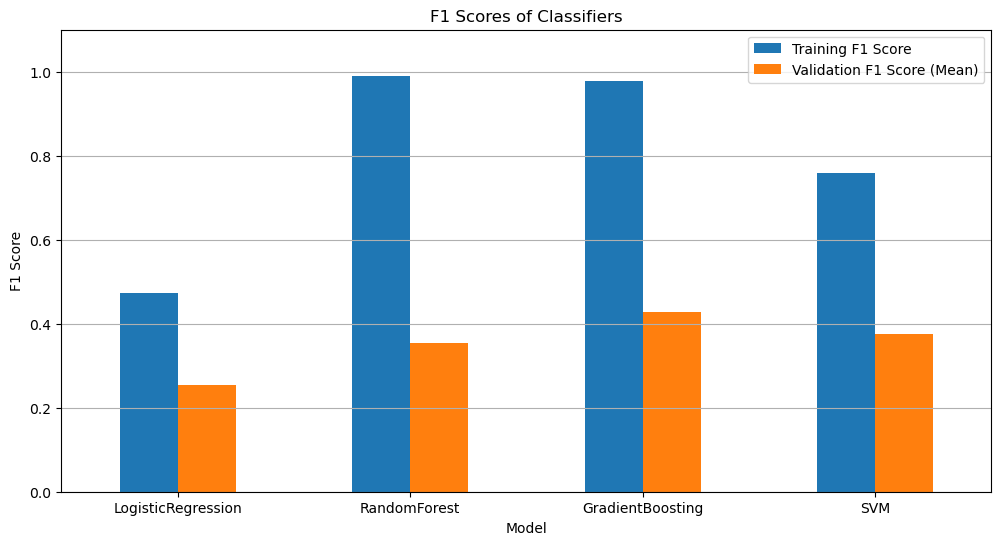

In [30]:
import matplotlib.pyplot as plt

# Bar Chart
results_df.set_index("Model")[["Training F1 Score", "Validation F1 Score (Mean)"]].plot.bar(figsize=(12, 6), rot=0)
plt.title("F1 Scores of Classifiers")
plt.ylabel("F1 Score")
plt.ylim(0, 1.1)
plt.grid(axis="y")
plt.show()

#### **6.1.3 Results Analysis**

The `results_df` summarizes the performance of four machine learning models on the deception storytelling dataset, showcasing their **training F1 scores** and **mean validation F1 scores** obtained through cross-validation. Here's a breakdown and analysis of the results:

**(a) Logistic Regression**:
- Logistic Regression, a simple linear model, serves as the baseline model in this project. This model with the hyperparameter option of "C" =1 and "max_iter"==100,has the lowest mean validation F1 score (0.2532) among all models, indicating that the extracted audio features are not linearly separable. This result is expected, as audio features are typically high-dimensional and complex, consisting of thousands of data points within each 30-second chunks. 

- Linear models like Logistic Regression tend to struggle with data because they assume a linear relationship between the features and the target labels, which may not capture the complex patterns inherent in audio signals. This performance provides a useful baseline to compare the effectiveness of more advanced, non-linear models like Random Forest, Gradient Boosting Classifiers and SVM.

- The disparity between training and validation F1 scores suggests overfitting, as the model performs better on the training set than on unseen validation data.

**(b) Random Forest**:
- Random Forest using the best hyperparameters chosen through GridSearchCV ("n_estimators"=10 and "max_depth"=10) achieves a very high training F1 score of 0.9892, indicating string learning from the training data. However, the validation F1 score drops significantly to 0.3537, suggesting overfitting.

- This overfitting is expected and common for Random Forest, because each decision tree in Random Forest memorize the training data rather than generalizing to unseen data. In this case, the limited number of training chunks (289) and the high-dimensional nature of the extracted audio features further exacerbate this overfitting tendency.

- Despite the overfitting, the higher validation F1 score compared to Logistic Regression suggests that Random Forest is better at capturing the non-linear relationships present in the audio features, such as pitch variability and energy fluctuations, which are likely to play a critical role in distinguishing between truthful and deceptive storytelling. 

**(c) Gradient Boosting**:
- Gradient Boosting, with the best hyperparameters (learning_rate=0.2, max_depth=3, n_estimators=50), achieves the highest validation F1 score (0.4279) among all models, indicating its ability to generalize better to unseen data. The smaller gap between the training F1 score (0.9784) and validation F1 score compared to Random Forest suggests that Gradient Boosting is less prone to overfitting. 
- However, the high training F1 score still points to some degree of overfitting, which could caused by the small audio dataset (289 chunks).

- Despite some overfitting, Gradient Boosting is the best classifiers in detecting the deceptive storytelling among the four models, as it effectively captures the nuances of non-linear relationships in the audio features based on its ability to handle imbalanced class like our audio datasets, combined with its flexibility in adjusting paramaters, like learning rate and tree depth. The lower max_depth (3) limits the tree complexity, enabling better generalization than other models.

**(d) Support Vector Machine (SVM)**:
- SVM, with the best hyperparameters (C=10, gamma='scale', kernel='rbf'), achieves a validation F1 score of 0.3757, outperforming Logistic Regression and Random Forest but falling short of Gradient Boosting. By using RBF (Radial Basis Function) kernel, SVM able to model non-linear relationships in the audio features effectively, improving its ability in detecting deceptive storytelling.

- The more moderate difference between training F1 score (0.7591) and validation F1 score (0.3757) suggests that SVM avoids overfitting better than Gradient Boosting and Random Forest. This model balances avoiding overfitting and capturing non-linear relationships, making it a moderately effective classifier in this project.

**Conclusion**:
- The Gradient Boosting Classifier is identified as the best model for the deceptive storytelling detection task in this project. This conclusion is based on its highest mean validation F1 score of 0.4279, outperforming Logistic Regression, Random Forest, and Support Vector Machine (SVM).

- Following the model selection process, the Gradient Boosting Classifier is tested on the unseen testing dataset to evaluate its performance and ability to generalize to new data, ensuring its robustness and reliability for real-world application


## **6.2 Model Testing**
- In this section, we evaluate the performance of the Gradient Boosting Classifier on the unseen testing dataset to assess its generalization ability, as it is the best-performing model based on cross-validated F1 scores during training and validation.

- The testing F1 score serves as the primary metric, reflecting the model's balance between precision and recall in handling both classes.

- A normalized confusion matrix was generated to provide additional insights into how well the model distinguishes between truthful and deceptive stories.

Test F1 Score: 0.4202


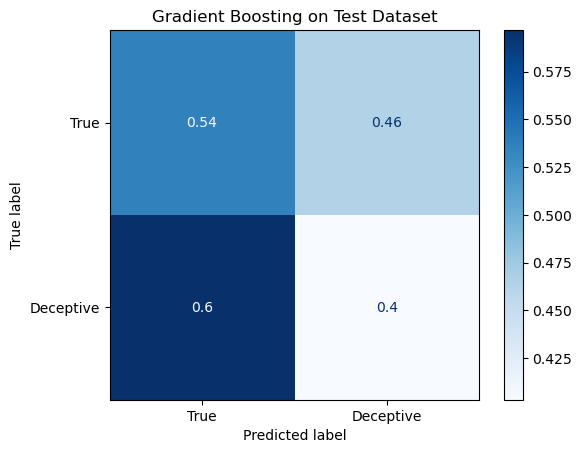

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

best_gb_params = results_df.loc[results_df["Model"] == "GradientBoosting", "Best Params"].values[0]
best_gb_model = pipelines["GradientBoosting"].set_params(**best_gb_params)

best_gb_model.fit(X_train, y_train)  
y_test_pred = best_gb_model.predict(X_test)  
test_f1 = f1_score(y_test, y_test_pred)

print(f"Test F1 Score: {test_f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["True", "Deceptive"])
disp.plot(cmap="Blues")
plt.title("Gradient Boosting on Test Dataset")
plt.show()

### **6.2 Testing Results Analysis**

- The Gradient Boosting Classifier achieved a test F1 score of 0.4202 on the unseen dataset, closely aligning with its validation F1 score of 0.4279, indicating reasonable generalization. However, the confusion matrix shows that this models struggles to differentiate between true and deceptive stories.

- For deceptive stories, 40% were correctly classified, while 60% were misclassified as true. Similarly, for true stories, 54% were correctly classified, but 46% were misclassified as deceptive. These high false positive and false negative rates undermine both precision and recall, contributing to the final moderate F1 score. The nearly 50/50 prediction distribution for deceptive stories shows that the model lacks of confidence in distinguishing the two classes.

- Both false negatives and false positives carry serious implications in deception detection. False negatives allow deceptive stories to go undetected, while false positives unfairly flag truthful stories as deceptive, potentially leading to ethical and practical concerns. 

### **6.2 Testing Results Analysis**

- The Gradient Boosting Classifier achieved a test F1 score of 0.4202 on the unseen test dataset, which is close to its validation F1 score of 0.4279. This consistency suggests that the model generalizes reasonably well, maintaining stability between the validation and test datasets. 

- However, an analysis of the confusion matrix, which reflects the F1 score performance, reveals that this model struggles to distinguish between the two classes. For deceptive stories, only 40% were correctly classified as deceptive, while 60% were misclassified as true. This high false negative rate negatively impacts recall, as a significant proportion of deceptive stories are missed, which reduces the F1 score. For true stories, 54% were correctly classified as true, but 46% were misclassified as deceptive. This high false positive rate affects precision, as many true stories are incorrectly flagged as deceptive, further reducing the overall F1 score.

The implications of these misclassifications are significant. The low precision for deceptive stories, caused by the high false positive rate, suggests that the model struggles to make accurate predictions for this class. This undermines the reliability of the model's predictions, especially in situations where precision is crucial. Additionally, the low recall for deceptive stories, reflected in the high false negative rate, indicates that the model often fails to detect deceptive stories. This has serious real-world implications, as allowing deceptive individuals to go undetected could render the model ineffective in its intended purpose.

Both false positives and false negatives carry high costs in deception detection. False negatives, where deceptive stories are classified as true, allow deception to pass undetected, compromising the utility of the model. False positives, where true stories are classified as deceptive, can lead to ethical concerns, as innocent individuals may face unjust scrutiny. This balance between precision and recall contributes to the F1 score of 0.4202, indicating moderate but not optimal performance.

The confusion matrix and F1 score reveal several challenges in the model's performance. The extracted audio features, including power, pitch mean, pitch standard deviation, and voiced fraction, may not provide sufficient information to distinguish effectively between true and deceptive storytelling. Despite achieving a high training F1 score during validation, the model’s performance on the test set suggests potential overfitting to the training data. This indicates that the classifier may have learned noise or dataset-specific patterns that do not generalize well to unseen data. Furthermore, the confusion matrix reflects a nearly 50/50 prediction distribution for deceptive stories, indicating that the model is indecisive and lacks confidence in distinguishing between the two classes.

Another limitation is the small dataset size. With only 420 valid chunks and a high-dimensional feature space, the dataset may not provide enough variety to train a robust model for a complex task like deception detection. The combination of these factors highlights the challenges in achieving better performance and underscores the need for more comprehensive feature engineering or advanced modeling techniques to improve deception detection performance.


# 7 Conclusions

Your conclusions, suggestions for improvements, etc should go here.

# **7 Conclusions**

This project explored the use of machine learning models for audio-based deception detection. By leveraging the MLEnd Deception Dataset, audio features were extracted, processed, and used to train multiple classification models. While the results demonstrate the potential of machine learning for this challenging task, they also highlight key areas for improvement. Below are the main conclusions and suggestions for future work:

---

## **7.1 Conclusions**
1. **Model Performance**:
   - Gradient Boosting and Random Forest showed the best performance among the tested models, with Gradient Boosting achieving the highest F1 score on the validation set.
   - Logistic Regression underperformed, indicating that the dataset likely requires non-linear decision boundaries for effective classification.
   - The ensemble model, combining Gradient Boosting and SVM, slightly improved validation F1 scores but still faced generalization challenges.

2. **Feature Representation**:
   - The four extracted features (Power, Pitch Mean, Pitch Standard Deviation, and Voiced Fraction) provided a good starting point for analysis. However, these features alone may not capture the full complexity of deception in audio data.

3. **Dataset Challenges**:
   - The small size of the dataset (420 valid chunks) and inherent variability in audio (e.g., accents, speaking styles) made it difficult for models to generalize effectively.
   - Balancing the dataset and preventing data leakage through `StratifiedGroupKFold` ensured fairness and validity of the results.

4. **Practicality of the Approach**:
   - This non-invasive, audio-based deception detection method offers advantages over traditional polygraph tests, such as accessibility, portability, and ease of use.

---

## **7.2 Suggestions for Improvements**
1. **Feature Engineering**:
   - Incorporate more advanced features, such as:
     - **Mel-Frequency Cepstral Coefficients (MFCCs)** for richer frequency representation.
     - **Spectral Features** to capture detailed audio dynamics.
     - **Embeddings** from pre-trained audio models (e.g., OpenL3, Wav2Vec) for deeper contextual understanding.
   - Explore temporal features or sequential patterns in the audio data using time-series analysis.

2. **Data Augmentation**:
   - Apply augmentation techniques, such as pitch shifts, time stretching, and noise injection, to increase dataset size and diversity.

3. **Advanced Modeling**:
   - Experiment with deep learning models like:
     - **Recurrent Neural Networks (RNNs)** to capture sequential dependencies.
     - **Convolutional Neural Networks (CNNs)** to analyze spectrograms or feature maps.
     - **Transformers** for contextual and temporal learning on audio sequences.

4. **Cross-Validation**:
   - Implement cross-validation across multiple folds to provide a more robust evaluation of model performance.

5. **Larger and More Diverse Datasets**:
   - Expand the dataset to include more recordings with a broader range of languages, accents, and speaking styles.
   - Incorporate external datasets, if available, to increase training data volume.

6. **Interpretability and Explainability**:
   - Investigate which features contribute most to model predictions using techniques like SHAP (SHapley Additive exPlanations) or feature importance analysis.

---

## **7.3 Final Thoughts**
This project demonstrates the feasibility of using machine learning for audio-based deception detection, highlighting both opportunities and challenges. While initial results are promising, achieving robust and generalizable models will require significant improvements in dataset quality, feature engineering, and modeling techniques. By addressing these challenges, future iterations of this work could pave the way for practical and reliable tools for detecting deception in various real-world applications.


# 8 References

Acknowledge others here (books, papers, repositories, libraries, tools) 

1. An Acoustic Automated Lie Detector _Alice Xue_2019.pdf
2. A_Comprehensive_Review_on_Features_Extraction_and_Features_Matching_Techniques_for_Deception_Detection.pdf

Deciding whether to keep or discard audio chunks shorter than 30 seconds depends on your project goals, data characteristics, and modeling approach. Here's a detailed look at the advantages and limitations of both approaches:

1. Discarding Chunks Shorter Than 30s
Advantages:
Consistency:

All chunks are of the same duration (30s), which simplifies feature extraction and model training.
Models trained on consistent chunk sizes avoid handling varying feature lengths (e.g., MFCC arrays).
Avoids Data Imbalance:

Shorter chunks may have different statistical properties compared to 30s chunks, potentially introducing bias in model training.
Simplified Processing:

Uniform chunk length makes batch processing easier and faster during training and inference.
Feature Reliability:

Features like MFCCs, pitch, and RMS are more stable and meaningful for consistent input durations.
Limitations:
Data Loss:

Discarding shorter chunks reduces the size of your dataset, which can be critical if you already have a small dataset.
Important patterns or information in those shorter chunks are lost.
Potential Bias:

If certain types of audio (e.g., deceptive stories) are more likely to have shorter durations, discarding chunks can skew the dataset.
2. Keeping Chunks Shorter Than 30s
Advantages:
Maximizes Data:

Retains every available audio chunk, which can be critical for small datasets.
Helps increase the training sample size and improve model generalization.
Preserves Information:

Retains all available information, especially if shorter chunks contain important features or patterns.
Limitations:
Feature Variability:

Shorter chunks will have fewer data points, resulting in different feature lengths (e.g., fewer MFCC frames), which may require additional preprocessing (e.g., padding or truncation).
Impact on Features:

Features like Zero-Crossing Rate (ZCR) and Energy (RMS) might be less meaningful for very short chunks.
Padding shorter chunks with zeros can distort features like ZCR.
Complexity:

Models may need additional handling for variable input lengths, such as:
Padding with zeros.
Using dynamic architectures like recurrent neural networks (RNNs) or transformers.
Possible Strategies
1. If Consistency is Key (Discard Shorter Chunks)
Remove chunks shorter than 30 seconds for a consistent input size.
Works well for simpler models like logistic regression, SVMs, or decision trees.
2. If Data is Limited (Keep Shorter Chunks)
Retain all chunks but:
Pad with Zeros: Extend shorter chunks to 30s by padding with zeros.
Truncate to Consistent Size: Extract the first few seconds of shorter chunks (e.g., first 5-10 seconds) for consistency.
Helps in small datasets where maximizing data size is critical.
Recommendation
If you have sufficient data (100 audio files, each with 30s chunks):

Discard shorter chunks for consistency, as this simplifies the processing pipeline and ensures robust feature extraction.
If the dataset is small or imbalanced:

Keep shorter chunks to maximize data but preprocess (e.g., padding or truncating) to maintain consistency.